In [370]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

R_air = 287.058 #J/kgK
T_rm = 16.5 + 273.15 #K
P_rm = 657.3 * mmHg_to_Pa #Pa
rho = P_rm/(R_air*T_rm) #kg/m3 of air
print(rho)
    
# Pressure data processing
theta = np.concatenate((np.arange(0,95,5), np.arange(100,200,20)))

Pmean = np.empty(len(theta)) #
Pstd = np.empty(len(theta))
Pstd_bar = np.empty(len(theta))
Pcyl = np.empty(len(theta))

for i in range(len(theta)):
    fileName = './Data/Pcyl_deg' + str(theta[i])
    data = np.loadtxt(fileName)
    Pmean[i] = np.mean(data) * mmHg_to_Pa
    Pstd[i] = np.mean(data) * mmHg_to_Pa
    Pstd_bar[i] = Pstd[i]/(np.sqrt(len(data)))
    Pcyl[i] = P_rm - Pmean[i]

print(Pcyl)
print(Pmean)
theta = theta * (np.pi/180)


1.0539396656158917
[87590.10611429 87590.14548008 87589.31609121 87587.35410837
 87584.90971432 87580.85978646 87576.97032192 87571.49560091
 87566.32134697 87561.32438556 87556.2042496  87551.22045153
 87547.47142568 87544.65116623 87543.32536007 87543.63533351
 87545.46431598 87547.2775436  87548.58187831 87549.41253647
 87549.45387277 87549.36643367 87549.47447435 87549.3209167 ]
[41.12988571 41.09051992 41.91990879 43.88189163 46.32628568 50.37621354
 54.26567808 59.74039909 64.91465303 69.91161444 75.0317504  80.01554847
 83.76457432 86.58483377 87.91063993 87.60066649 85.77168402 83.9584564
 82.65412169 81.82346353 81.78212723 81.86956633 81.76152565 81.9150833 ]


In [371]:
# Freestream data processing
yD_free = np.arange(0,5,1)
uMean_free = np.empty(len(yD_free)) #m/s
std_u_free = np.empty(len(yD_free))
Pinf = np.empty(len(yD_free))
mmHg_to_Pa = 133.32 #conversion factor 

for i in range(len(yD_free)):
    fileName = './Data/Uinf_yD' + str(yD_free[i])
    data = np.loadtxt(fileName)
    uMean_free[i] = np.mean(data) * mmHg_to_Pa
    std_u_free[i] = (np.std(data) * mmHg_to_Pa)/np.sqrt(len(data))
    Pinf[i] = P_rm - (np.mean(data) * mmHg_to_Pa)

def convert_PtoU(x):
    R_air = 287.058 #J/kgK
    T_rm = 16.5 + 273.15 #K
    P_rm = 657.3 * mmHg_to_Pa #Pa
    rho = P_rm/(R_air*T_rm) #kg/m3 of air
    
    for i in range(len(x)):
        x[i] = np.sqrt((2*x[i])/rho)
        
    return x

# print(uMean_free)
uMean_free = convert_PtoU(uMean_free)
std_u_free = convert_PtoU(std_u_free)
# print(uMean_free)
# print(std_u_free)
print(Pinf)
Uinf = np.mean(uMean_free)

[87610.11086017 87610.08108952 87609.99752042 87609.76219553
 87609.48912031]


In [372]:
# Wake profile data processing
yD = np.concatenate((np.arange(0.0,0.7,0.1), np.arange(0.8, 2.8, 0.2), np.arange(3, 4.5, 0.5)))
uMean = np.empty(len(yD))
std_u = np.empty(len(yD))
std_u_bar = np.empty(len(yD))
Pwake = np.empty(len(yD))

for i in range(len(yD)):
    fileName = './Data/Uwake_yD' + str(round(yD[i],1))
    data = np.loadtxt(fileName)
    uMean[i] = np.mean(data) * mmHg_to_Pa
    std_u[i] = np.std(data) * mmHg_to_Pa
    std_u_bar[i] = (np.std(data) * mmHg_to_Pa)/np.sqrt(len(data))
    Pwake[i] = P_rm - np.mean(data) * mmHg_to_Pa
    
    
uMean = convert_PtoU(uMean)
std_u = convert_PtoU(std_u)
std_u_bar = convert_PtoU(std_u_bar)
print(Pwake)
# print(uMean)
# print(std_u)
# print(std_u_bar)

[87616.80050628 87616.39463475 87615.98099445 87615.16412311
 87614.35651635 87613.18361101 87611.95068505 87610.58150108
 87609.78623219 87609.2648995  87608.86539219 87608.48108087
 87608.09731099 87607.93436235 87607.77128945 87607.69119093
 87607.71737562 87607.73381428 87607.70565021 87607.52668009]


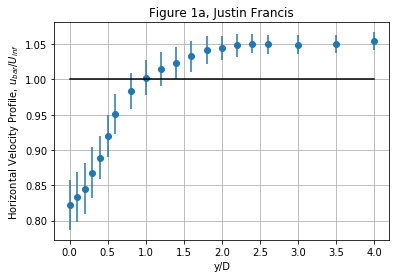

In [378]:
#fig 1a

plt.figure(1)
plt.errorbar(yD, np.divide(uMean, Uinf), yerr=np.divide(std_u_bar, Uinf), fmt='o')
plt.errorbar([min(yD), max(yD)], [1,1], color='k')
plt.title('Figure 1a, Justin Francis')
plt.ylabel('Horizontal Velocity Profile, $u_{bar}/U_{inf}$')
plt.xlabel('y/D')
plt.grid()
plt.savefig('Fig1a.png', dpi = 800)
plt.show()

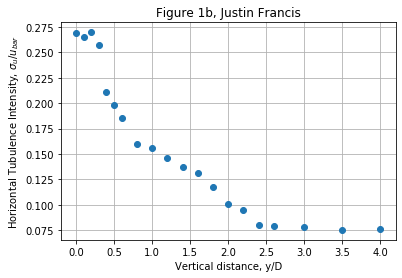

In [374]:
#fig 1b
plt.figure(2)
plt.title('Figure 1b, Justin Francis')
plt.ylabel('Horizontal Tubulence Intensity, $\sigma_u/u_{bar}$')
plt.xlabel('Vertical distance, y/D')
plt.plot(yD, np.divide(std_u,uMean), 'o')
plt.grid()
plt.savefig('Fig1b.png', dpi = 800)
plt.show()

[ 1.09201195  1.09385602  1.05500368  0.96309549  0.84858897  0.65887195
  0.47667176  0.22021096 -0.0221746  -0.25625497 -0.4961054  -0.72956914
 -0.90519054 -1.0373043  -1.09941109 -1.08489052 -0.99921268 -0.91427286
 -0.85317189 -0.81426009 -0.81232371 -0.81641976 -0.81135864 -0.81855198]


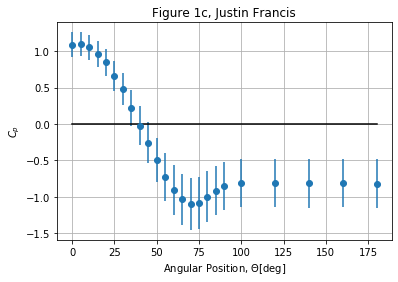

In [375]:
#fig 1c
R_air = 287.058 #J/kgK
T_rm = 16.5 + 273.15 #K
P_rm = 657.3 * mmHg_to_Pa #Pa
rho = P_rm/(R_air*T_rm) #kg/m3 of air

Pinf_mean = min(Pinf) #np.mean(Pinf)
# print('Pinf: ', Pinf_mean)
# print('Pcyl: ', Pcyl)
# print('Pwake: ', Pwake)
#NOTE: I HAD NONSENSICAL CP VALUES (NEGATIVE FOR THE WHOLE SPECTRUM) SO I BACK CALCULATED THE SHIFT VALUE OF 
# TWO FROM THE MOMENTUM EQUATION
Cp = (Pcyl - Pinf_mean)/(0.5*rho*Uinf**2) + 2 #THIS PLUS 2
print(Cp)

Pstd_bar = Pstd_bar/Uinf
plt.figure(3)
plt.title('Figure 1c, Justin Francis')
plt.ylabel('$C_p$')
plt.xlabel('Angular Position, $ \Theta $[deg]')
plt.errorbar(theta*180/np.pi, Cp, yerr=Pstd_bar, fmt='o')
plt.plot([min(theta)*180/np.pi, max(theta)*180/np.pi], [0, 0], color='k')
plt.savefig('Fig1c.png', dpi = 800)
plt.grid()
plt.show()

1.5001318804173625
1.6099009268343094
7099.305185212387


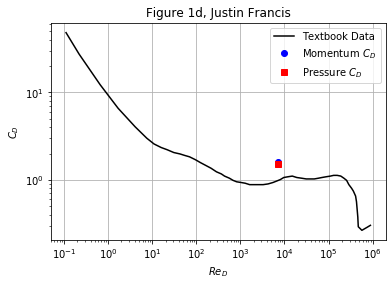

In [410]:
from scipy import integrate
#fig 1d
#import textbook data
textData = np.loadtxt('./Data/textbook.txt')

# pressure around cylinder Cp
d = 0.01905 #m
mu_air = 1.8e-5
Re_d = (rho*Uinf*d)/mu_air

Cd = integrate.simps(theta, Cp*np.cos(theta))
print(Cd)

#mom flux Cp
H = 0.3048 #m
int1 = 2*integrate.simps(Pinf, np.linspace(0, H/2, len(Pinf))) 
int2 = -2*integrate.simps(Pwake, np.linspace(0, H/2, len(Pwake)))
int3 = 2*rho*integrate.simps(uMean_free**2, np.linspace(0, H/2, len(uMean_free)))
int4 = -2*rho*integrate.simps(uMean**2, np.linspace(0, H/2, len(uMean)))
Fd = int1 + int2 + int3 + int4

Cd_mom = Fd/(0.5*rho*Uinf**2*d*H)
print(Cd_mom)
print(Re_d)

plt.figure(4)
plt.loglog(textData[:,0], textData[:,1], 'k', label='Textbook Data')
plt.title('Figure 1d, Justin Francis')
plt.ylabel('$C_D$')
plt.xlabel('$Re_D$')
plt.grid()

plt.plot(Re_d, Cd_mom, 'bo', label='Momentum $C_D$')
plt.plot(Re_d, Cd, 'rs', label='Pressure $C_D$')
plt.legend()
plt.savefig('Fig1d.png', dpi=800)
plt.show()

In [408]:
#short answer
maxIdx = np.argmax(std_u_bar)
print('max uncertainty ubar: ', (2*std_u_bar[maxIdx])/uMean[maxIdx] * 100)
# print(2* max(Pstd))
# print(max(Pcyl))
# print(max(Pinf))
print(max(Pmean))
print('max uncertainty Cp: ', ((2*np.std(Pcyl-np.mean(Pinf)))/(np.mean(Pcyl)-np.mean(Pinf)) * 100))
Cd_text = 1.0063
print('diff cd Press: ', (abs(Cd_text - Cd)/Cd_text) *100)
print('diff cd mom: ', (abs(Cd_text - Cd_mom)/Cd_text) *100)

max uncertainty ubar:  8.672443278414663
87.91063992543275
max uncertainty Cp:  -70.38484166210283
diff cd Press:  49.07402170499478
diff cd mom:  59.98220479323357
